In [24]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [25]:
#load data
qb24 = pd.read_csv('data/QB24.csv')
qb23 = pd.read_csv('data/QB23.csv')
qb22 = pd.read_csv('data/QB22.csv')

rb24 = pd.read_csv('data/RB24.csv')
rb23 = pd.read_csv('data/RB23.csv')
rb22 = pd.read_csv('data/RB22.csv')

wr24 = pd.read_csv('data/WR24.csv')
wr23 = pd.read_csv('data/WR23.csv')
wr22 = pd.read_csv('data/WR22.csv')

te24 = pd.read_csv('data/TE24.csv')
te23 = pd.read_csv('data/TE23.csv')
te22 = pd.read_csv('data/TE22.csv')

k24 = pd.read_csv('data/K24.csv')
k23 = pd.read_csv('data/K23.csv')
k22 = pd.read_csv('data/K22.csv')

dst24 = pd.read_csv('data/DST24.csv')
dst23 = pd.read_csv('data/DST23.csv')
dst22 = pd.read_csv('data/DST22.csv')

Data Cleaning

In [26]:
# Drop all rows with null values for each DataFrame
qb24 = qb24.dropna()
rb24 = rb24.dropna()
wr24 = wr24.dropna()
te24 = te24.dropna()
k24 = k24.dropna()
dst24 = dst24.dropna()

In [27]:
# Convert 'Roster %' to decimals for all DataFrames
def convert_roster_percent_to_decimal(df):
    if 'ROST' in df.columns:
        df['ROST'] = df['ROST'].str.rstrip('%').astype(float) / 100
    return df

# Apply the conversion to all relevant DataFrames
qb24 = convert_roster_percent_to_decimal(qb24)
rb24 = convert_roster_percent_to_decimal(rb24)
wr24 = convert_roster_percent_to_decimal(wr24)
te24 = convert_roster_percent_to_decimal(te24)
k24 = convert_roster_percent_to_decimal(k24)
dst24 = convert_roster_percent_to_decimal(dst24)

In [28]:
# Remove commas from all "Yards" columns
def remove_commas_from_yards(df):
    for col in df.columns:
        if "YDS" in col:
            df[col] = df[col].astype(str).str.replace(',', '', regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting invalid values to NaN
    return df

# Apply the function to all relevant DataFrames
qb24 = remove_commas_from_yards(qb24)
rb24 = remove_commas_from_yards(rb24)
wr24 = remove_commas_from_yards(wr24)
te24 = remove_commas_from_yards(te24)

Data Visualization

In [29]:
qb24.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Lamar Jackson (BAL),316.0,474.0,66.7,4172,8.8,41.0,4.0,23.0,139.0,915.0,4.0,5.0,17.0,434.4,25.6,0.989
1,2.0,Josh Allen (BUF),307.0,483.0,63.6,3731,7.7,28.0,6.0,14.0,102.0,531.0,12.0,2.0,17.0,385.1,22.7,0.992
2,3.0,Joe Burrow (CIN),460.0,652.0,70.6,4918,7.5,43.0,9.0,48.0,42.0,201.0,2.0,5.0,17.0,381.9,22.5,0.953
3,4.0,Baker Mayfield (TB),407.0,570.0,71.4,4500,7.9,41.0,16.0,40.0,60.0,378.0,3.0,2.0,17.0,381.8,22.5,0.898
4,5.0,Jayden Daniels (WAS),331.0,480.0,69.0,3568,7.4,25.0,9.0,47.0,148.0,891.0,6.0,0.0,17.0,364.7,21.5,0.965


In [30]:
rb24.head()

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Saquon Barkley (PHI),345.0,2005,5.8,72.0,17.0,13.0,33.0,43.0,278.0,8.4,2.0,1.0,16.0,322.3,20.1,0.991
1,2.0,Derrick Henry (BAL),325.0,1921,5.9,87.0,19.0,16.0,19.0,22.0,193.0,10.2,2.0,1.0,17.0,317.4,18.7,0.989
2,3.0,Jahmyr Gibbs (DET),250.0,1412,5.6,70.0,13.0,16.0,52.0,63.0,517.0,9.9,4.0,1.0,17.0,310.9,18.3,0.989
3,4.0,Bijan Robinson (ATL),304.0,1456,4.8,37.0,5.0,14.0,61.0,72.0,431.0,7.1,1.0,0.0,17.0,280.7,16.5,0.980
4,5.0,Josh Jacobs (GB),301.0,1329,4.4,38.0,7.0,15.0,36.0,43.0,342.0,9.5,1.0,3.0,17.0,257.1,15.1,0.984


In [31]:
te24.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,George Kittle (SF),78.0,94.0,1106,14.2,43.0,21.0,8.0,0.0,0.0,0.0,0.0,15.0,158.6,10.6,0.953
1,2.0,Brock Bowers (LV),112.0,153.0,1194,10.7,57.0,15.0,5.0,5.0,13.0,0.0,0.0,17.0,150.7,8.9,0.983
2,3.0,Trey McBride (ARI),111.0,147.0,1146,10.3,37.0,10.0,2.0,1.0,2.0,1.0,0.0,16.0,138.8,8.7,0.953
3,4.0,Jonnu Smith (MIA),88.0,111.0,884,10.0,57.0,4.0,8.0,2.0,-1.0,0.0,1.0,17.0,134.3,7.9,0.838
4,5.0,Mark Andrews (BAL),55.0,69.0,673,12.2,67.0,6.0,11.0,4.0,5.0,0.0,0.0,17.0,133.8,7.9,0.904


In [32]:
wr24.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Ja'Marr Chase (CIN),127.0,175.0,1708,13.4,70.0,19.0,17.0,3.0,32.0,0.0,0.0,17.0,276.0,16.2,0.987
1,2.0,Justin Jefferson (MIN),103.0,154.0,1533,14.9,97.0,28.0,10.0,1.0,3.0,0.0,0.0,17.0,214.5,12.6,0.992
2,3.0,Amon-Ra St. Brown (DET),115.0,141.0,1263,11.0,66.0,14.0,12.0,2.0,6.0,0.0,1.0,17.0,201.2,11.8,0.989
3,4.0,Brian Thomas Jr. (JAC),87.0,133.0,1282,14.7,85.0,18.0,10.0,6.0,48.0,0.0,0.0,17.0,197.0,11.6,0.977
4,5.0,Terry McLaurin (WAS),82.0,117.0,1096,13.4,86.0,12.0,13.0,2.0,2.0,0.0,1.0,17.0,185.8,10.9,0.953


In [33]:
k24.head()

,Rank,Player,FG,FGA,PCT,LG,1-19,20-29,30-39,40-49,50+,XPT,XPA,G,FPTS,FPTS/G,ROST
0,1.0,Brandon Aubrey (DAL),40.0,47.0,85.1,65.0,0.0,4.0,8.0,14.0,14.0,30.0,30.0,17.0,192.0,11.3,0.879
1,2.0,Chris Boswell (PIT),41.0,44.0,93.2,57.0,0.0,9.0,12.0,7.0,13.0,35.0,35.0,17.0,191.0,11.2,0.553
2,3.0,Cameron Dicker (LAC),39.0,42.0,92.9,59.0,1.0,9.0,9.0,11.0,9.0,33.0,36.0,17.0,179.0,10.5,0.826
3,4.0,Ka'imi Fairbairn (HOU),36.0,42.0,85.7,59.0,0.0,8.0,11.0,4.0,13.0,34.0,36.0,17.0,172.0,10.1,0.472
4,5.0,Jason Sanders (MIA),37.0,41.0,90.2,57.0,0.0,7.0,13.0,5.0,12.0,26.0,28.0,17.0,166.0,9.8,0.424


In [34]:
dst24.head()

,Rank,Player,SACK,INT,FR,FF,DEF TD,SFTY,SPC TD,G,FPTS,FPTS/G,ROST
0,1.0,Denver Broncos (DEN),63.0,15.0,9.0,12.0,5.0,2.0,0.0,17.0,147.0,8.6,0.831
1,2.0,Minnesota Vikings (MIN),49.0,24.0,9.0,10.0,3.0,0.0,0.0,17.0,125.0,7.4,0.743
2,3.0,Chicago Bears (CHI),40.0,11.0,13.0,14.0,1.0,0.0,2.0,17.0,121.0,7.1,0.245
3,4.0,Houston Texans (HOU),49.0,19.0,9.0,10.0,3.0,1.0,0.0,17.0,117.0,6.9,0.437
4,5.0,Seattle Seahawks (SEA),45.0,13.0,5.0,14.0,4.0,1.0,1.0,17.0,113.0,6.6,0.270


In [35]:
# Plotting Functions
def plot_qb_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'QB: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

def plot_rb_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'RB: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

def plot_wr_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'WR: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

def plot_te_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'TE: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

def plot_k_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'K: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

def plot_dst_graphs(df):
    cols_to_plot = [c for c in df.columns if c not in ['FPTS', 'FPTS/G', 'Rank', 'Player']]
    num_cols = len(cols_to_plot)
    rows = (num_cols + 1) // 2
    plt.figure(figsize=(12, rows * 4))
    for i, col in enumerate(cols_to_plot, start=1):
        plt.subplot(rows, 2, i)
        plt.scatter(df[col], df['FPTS'], alpha=0.7)
        plt.title(f'DST: {col} vs FPTS')
        plt.xlabel(col)
        plt.ylabel('FPTS')
    plt.tight_layout()
    plt.show()

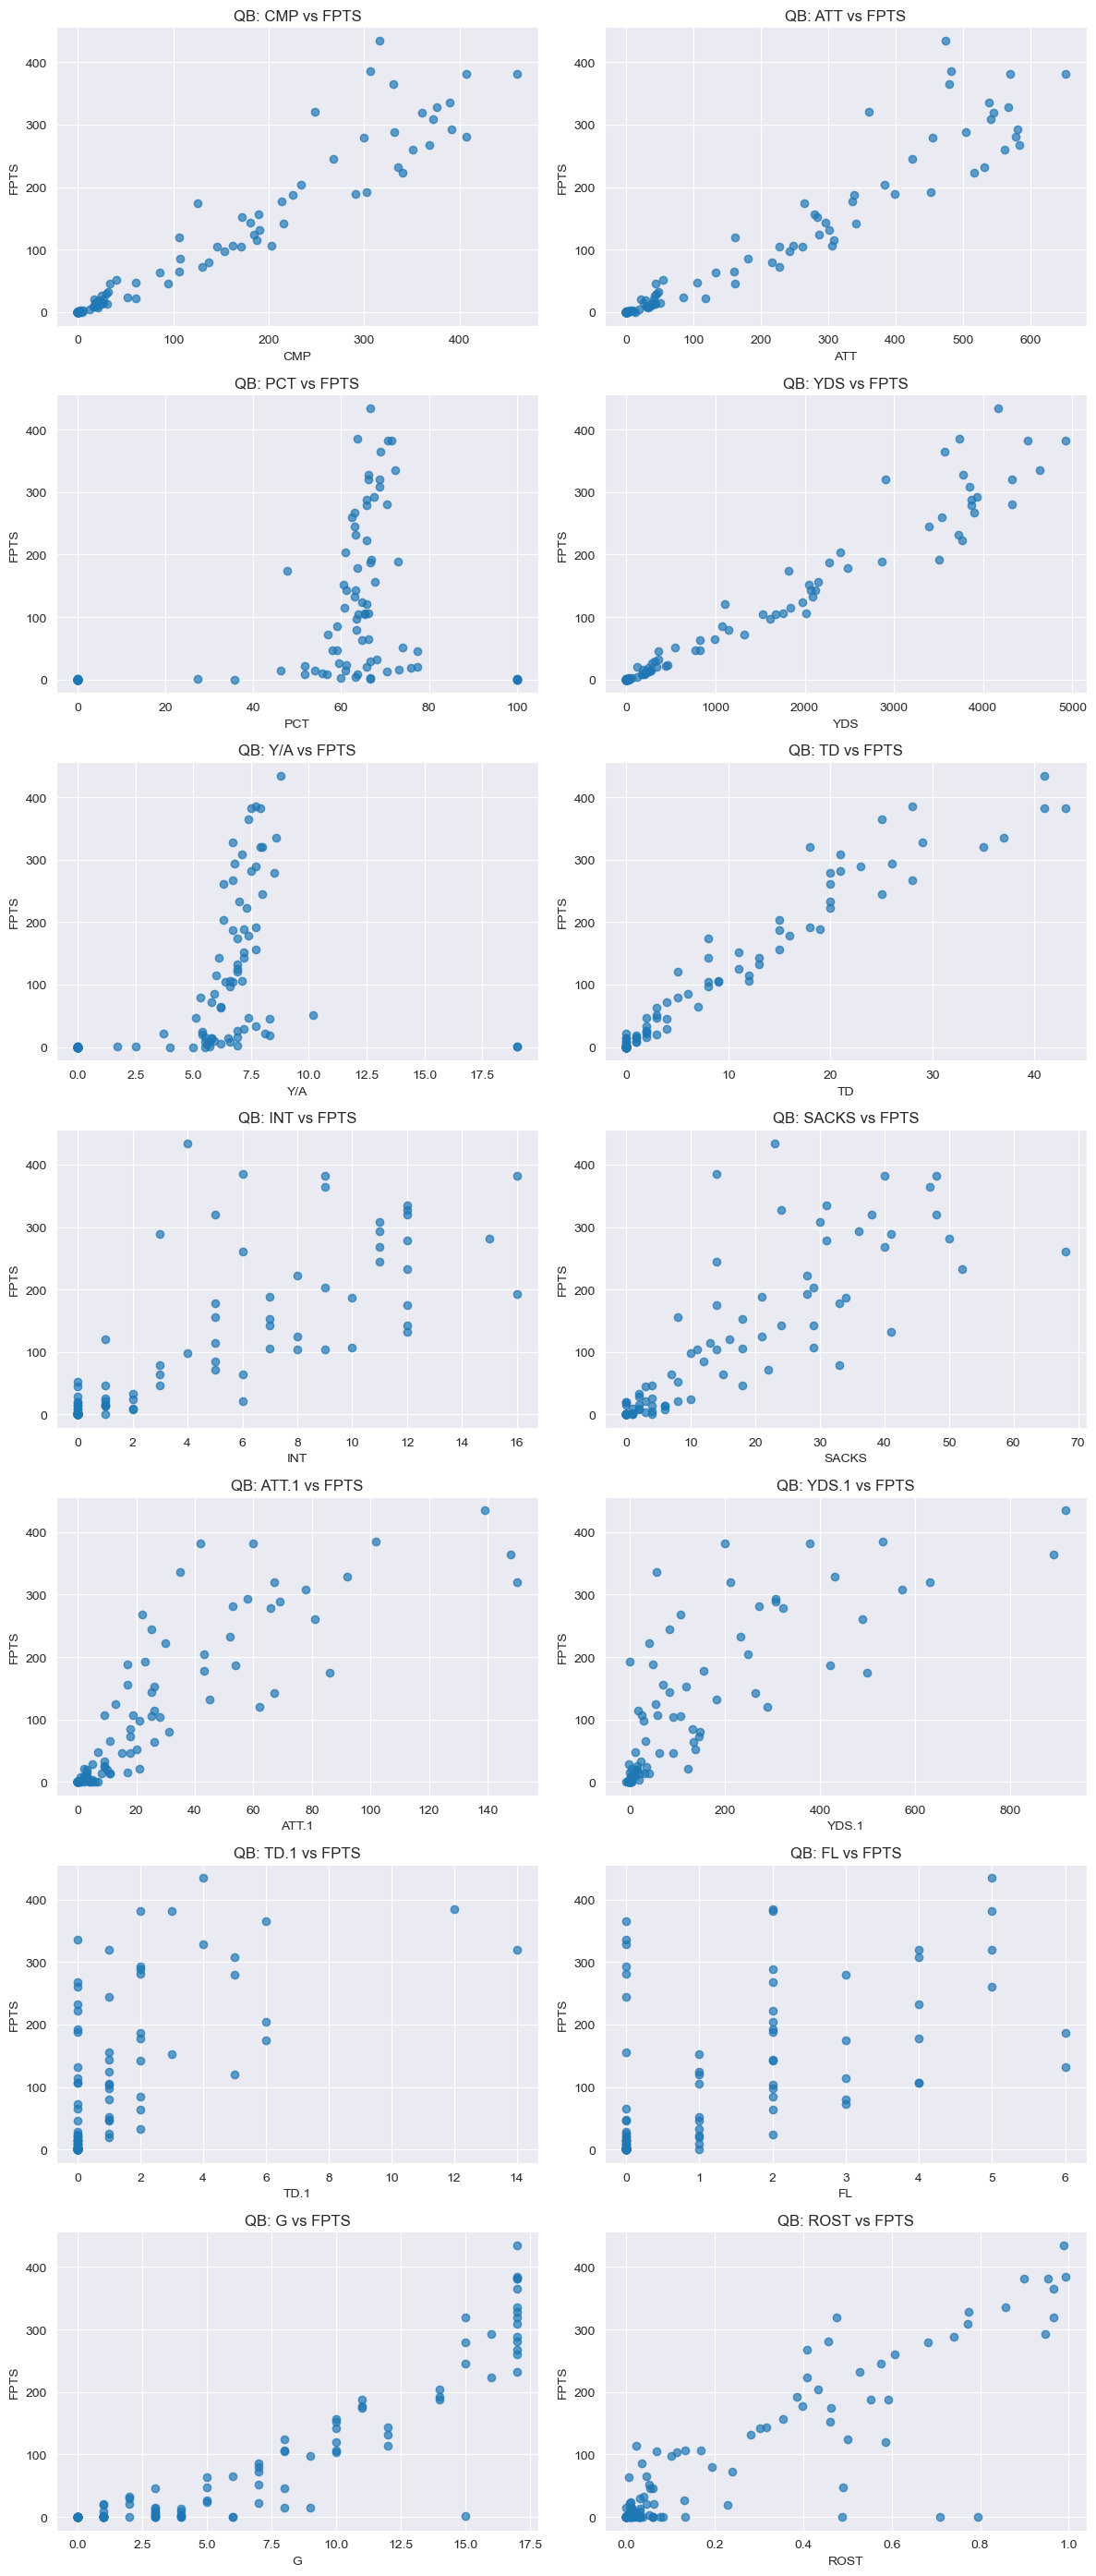

In [36]:
#plot graphs for each position from 2024 season
plot_qb_graphs(qb24)

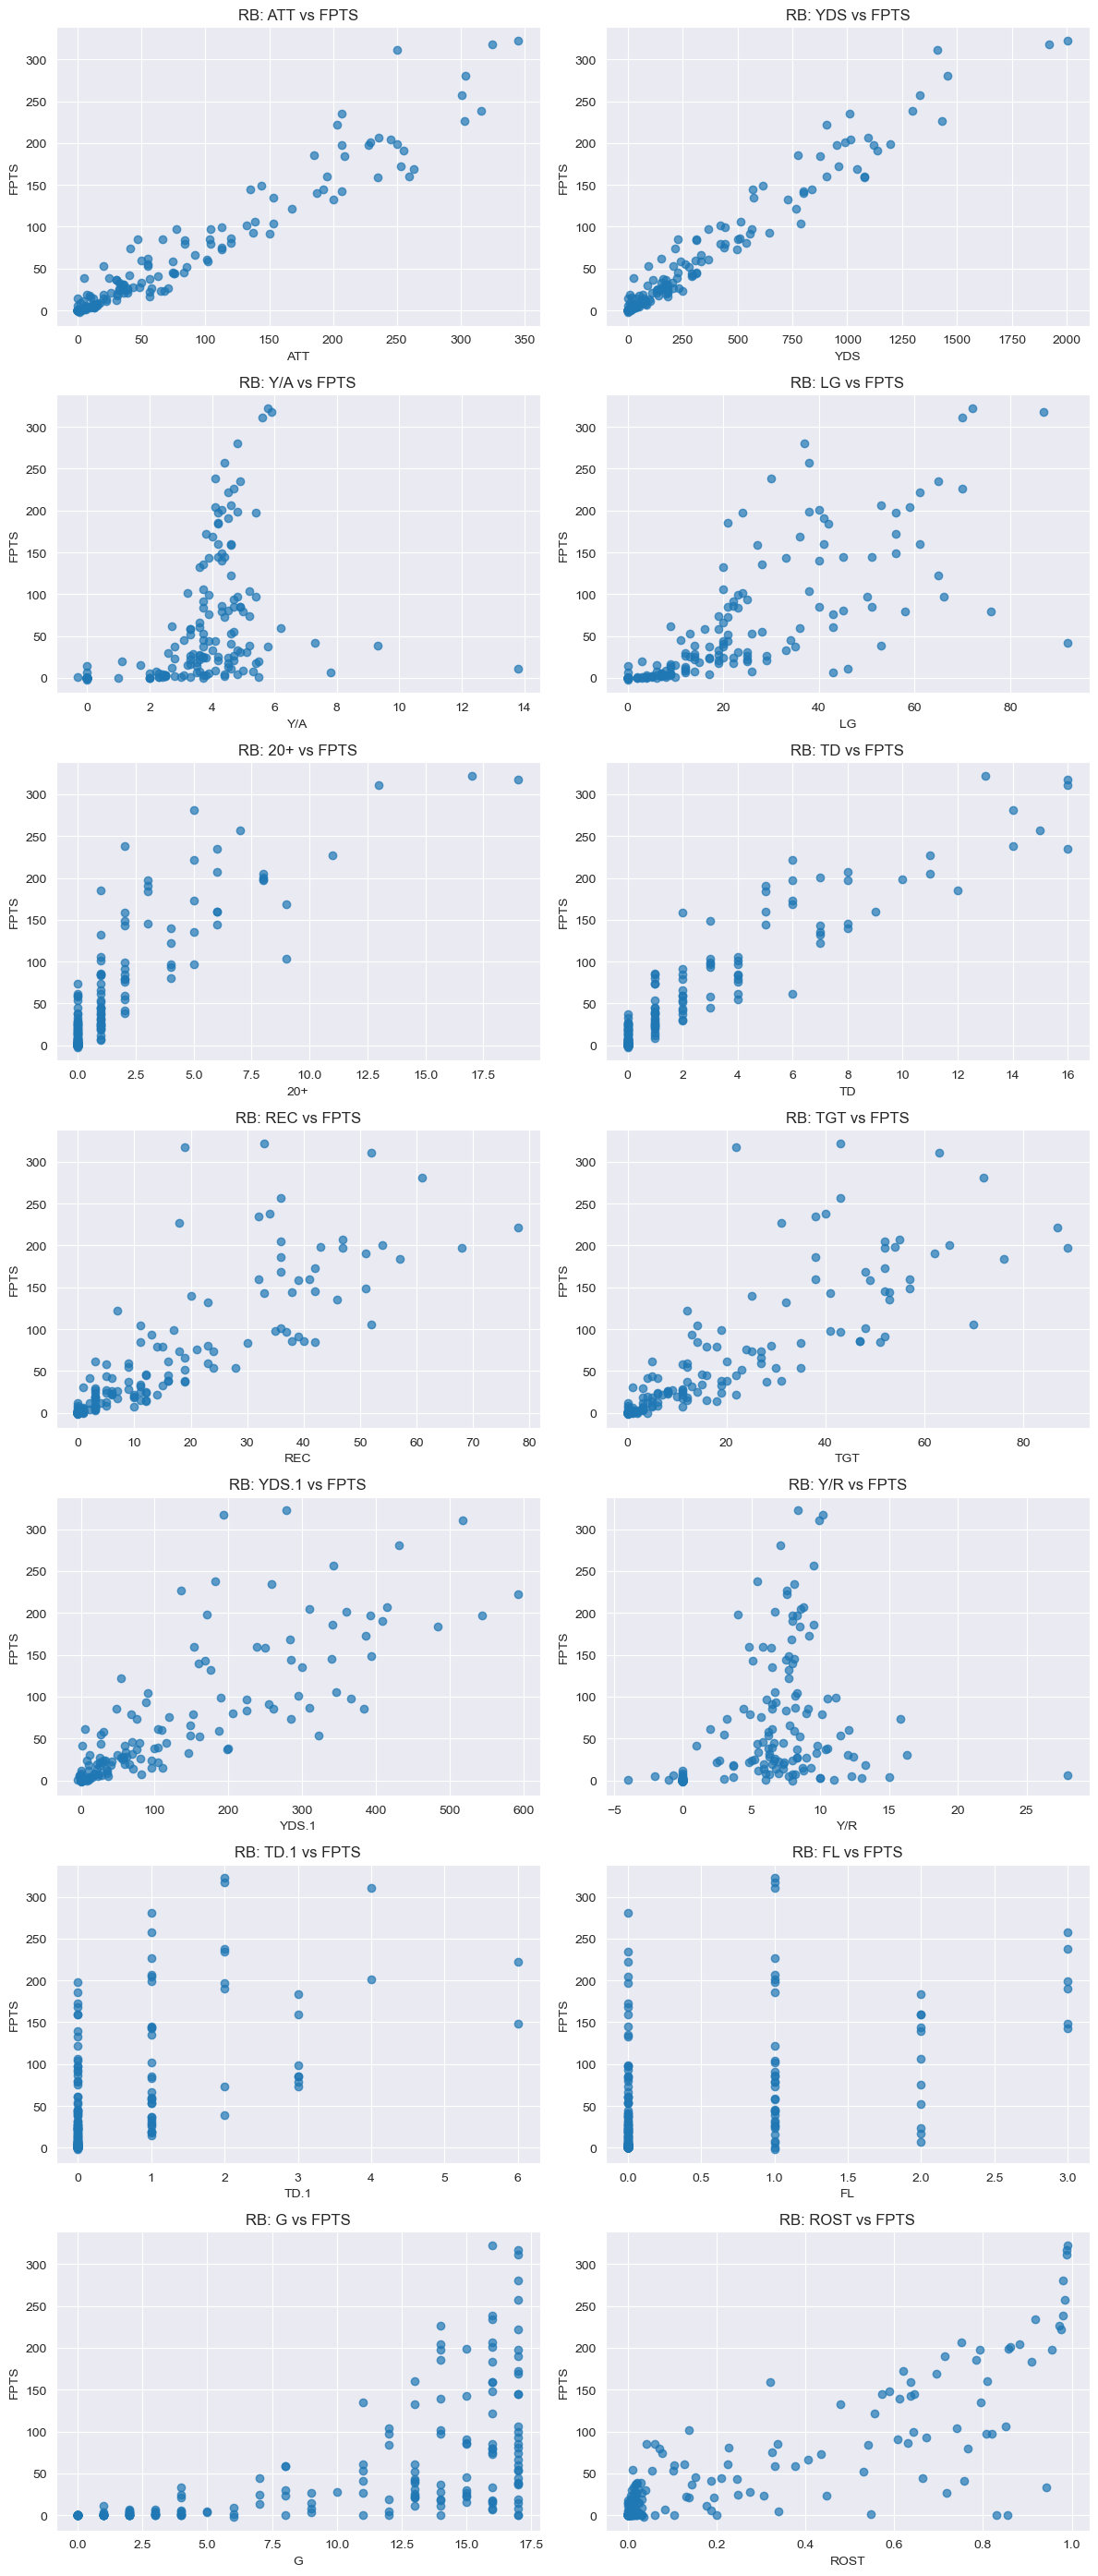

In [37]:
plot_rb_graphs(rb24)

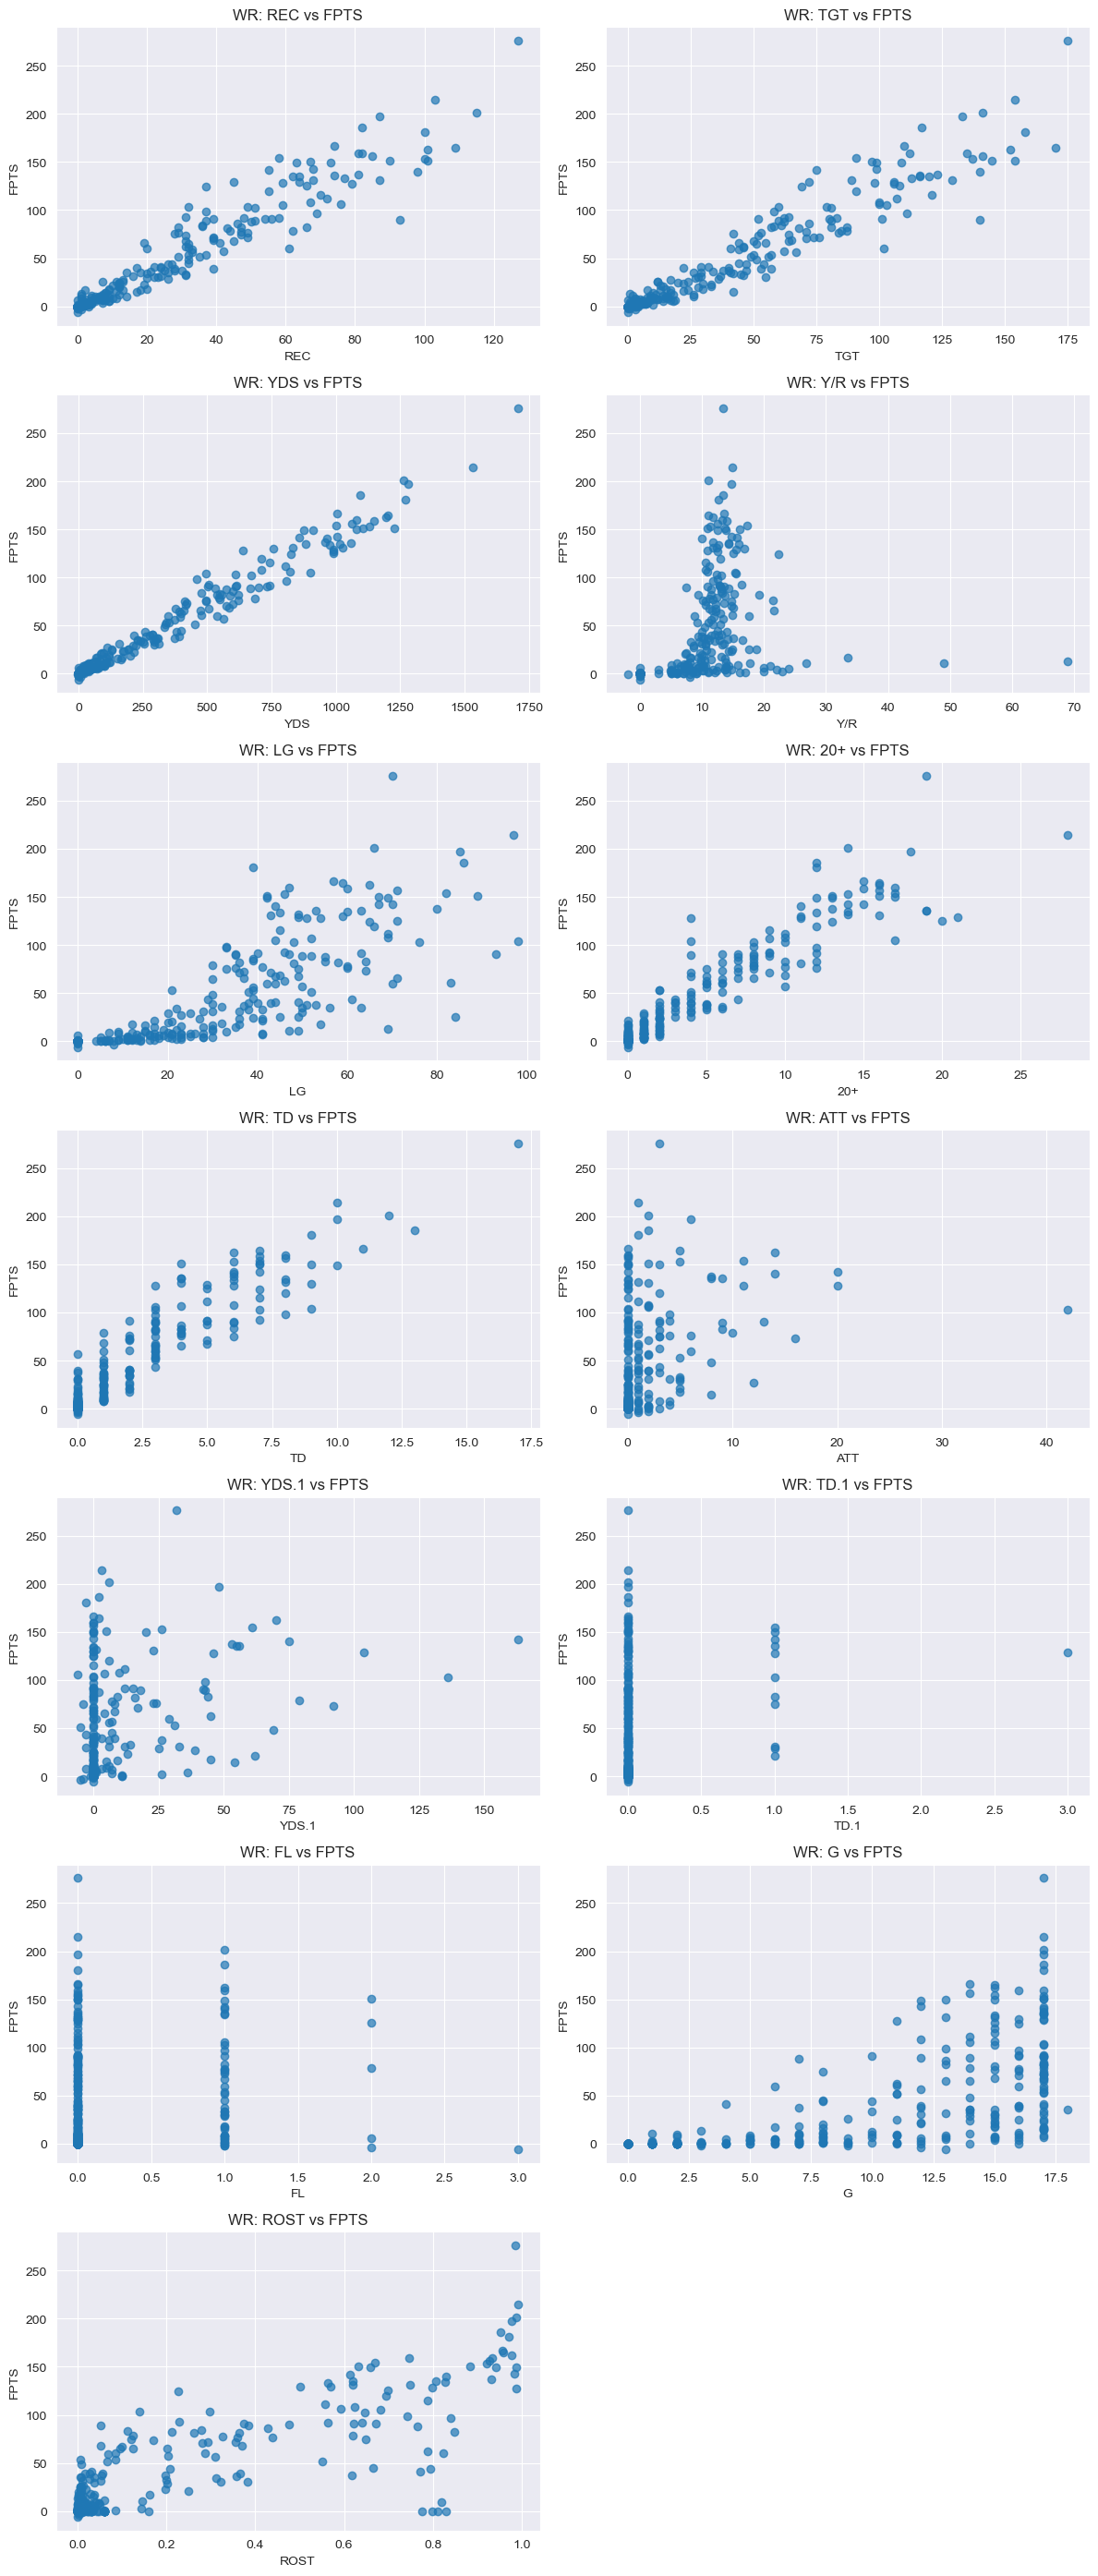

In [38]:
plot_wr_graphs(wr24)

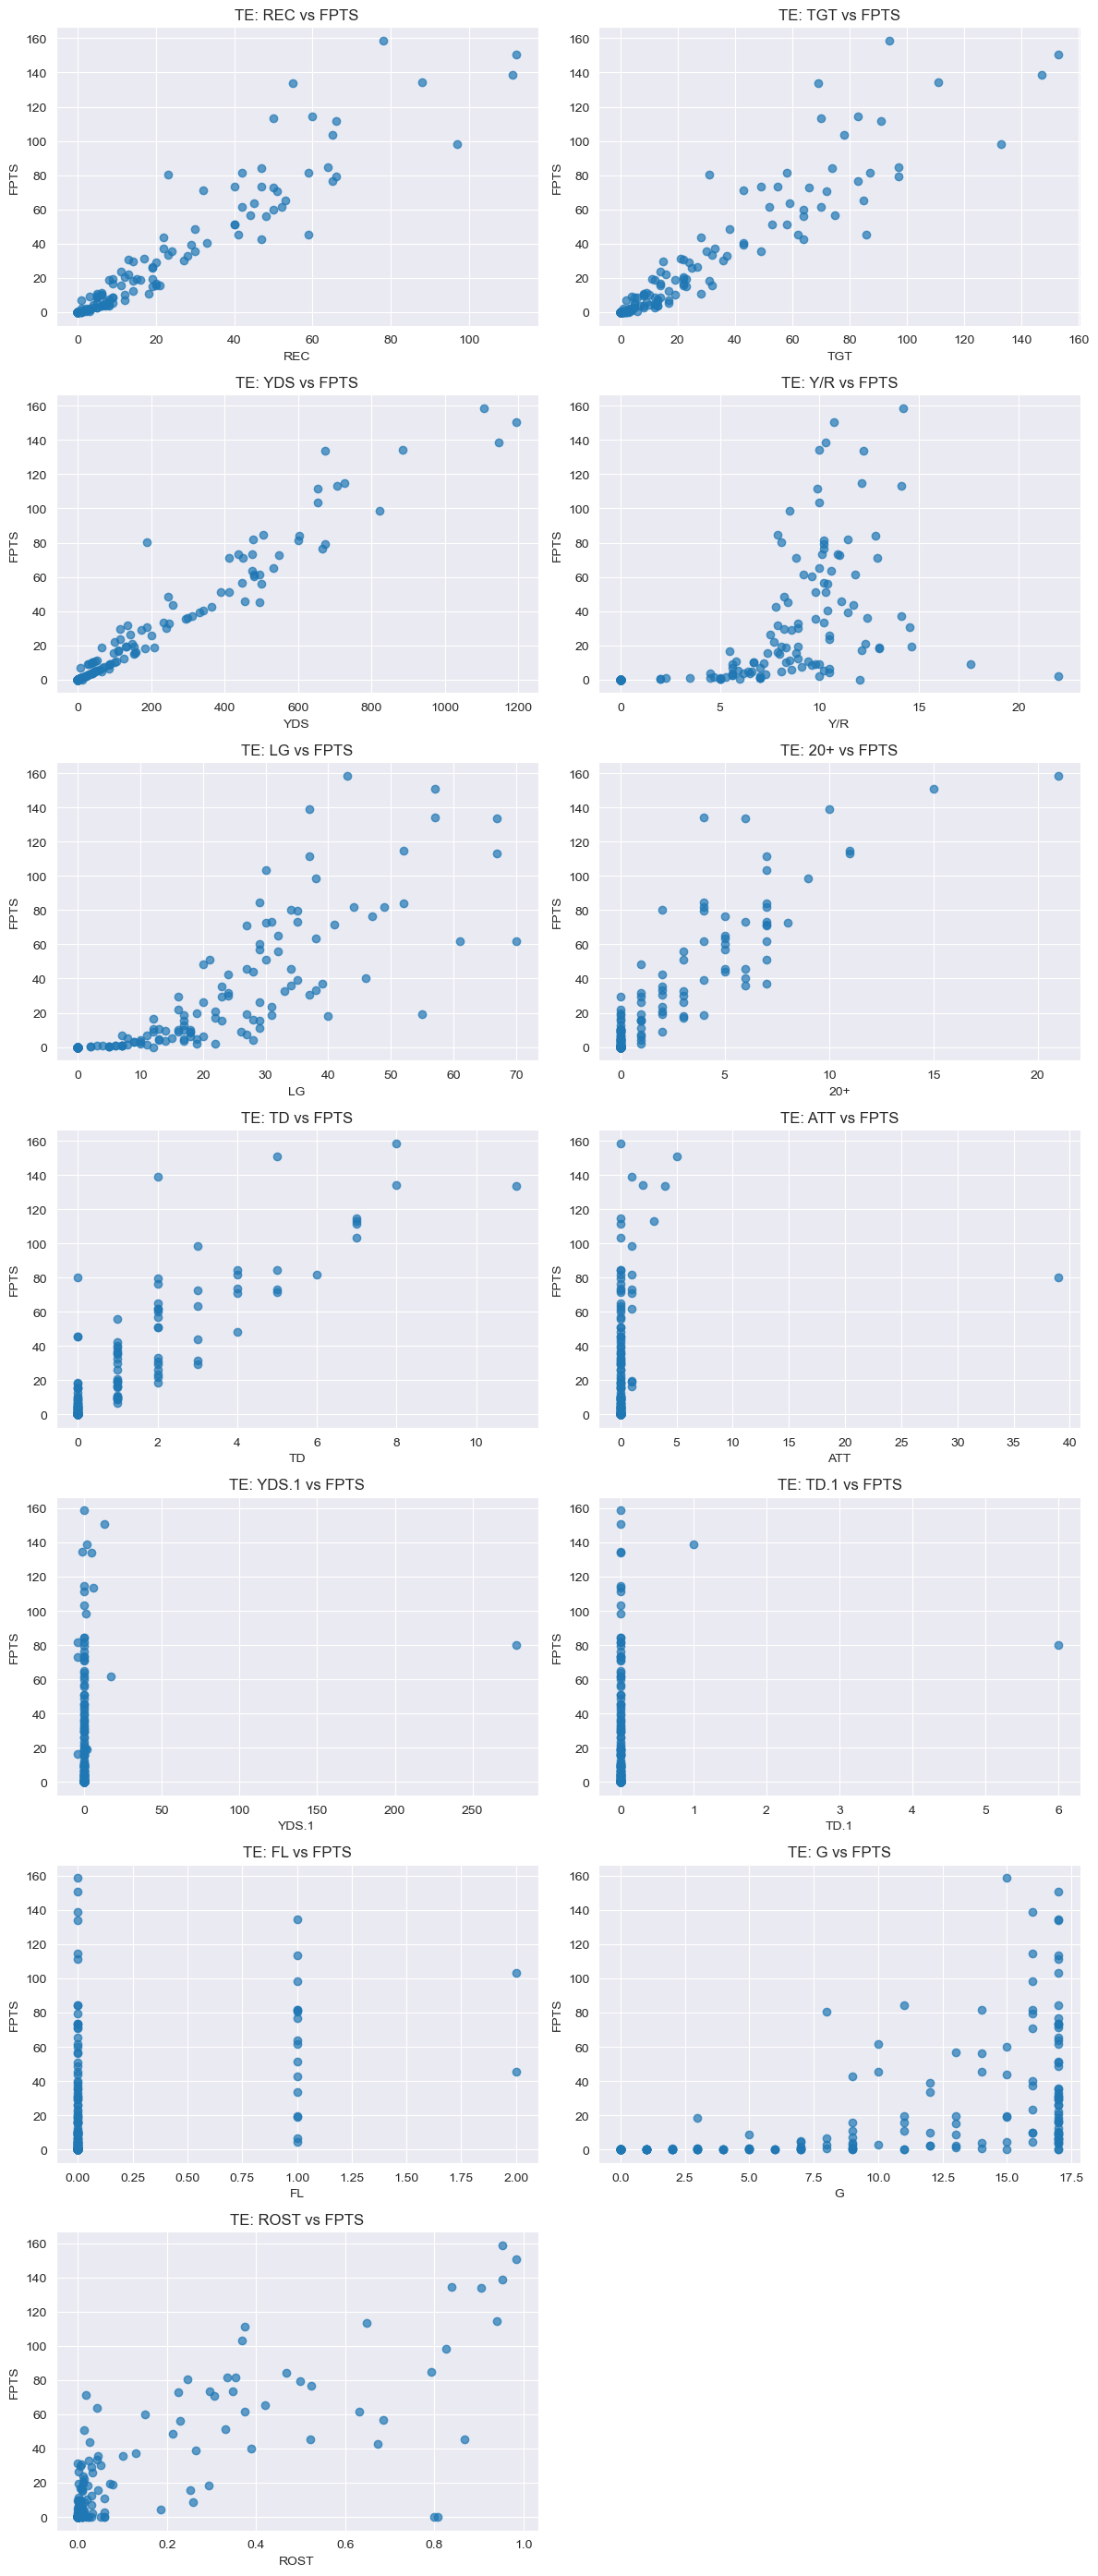

In [39]:
plot_te_graphs(te24)

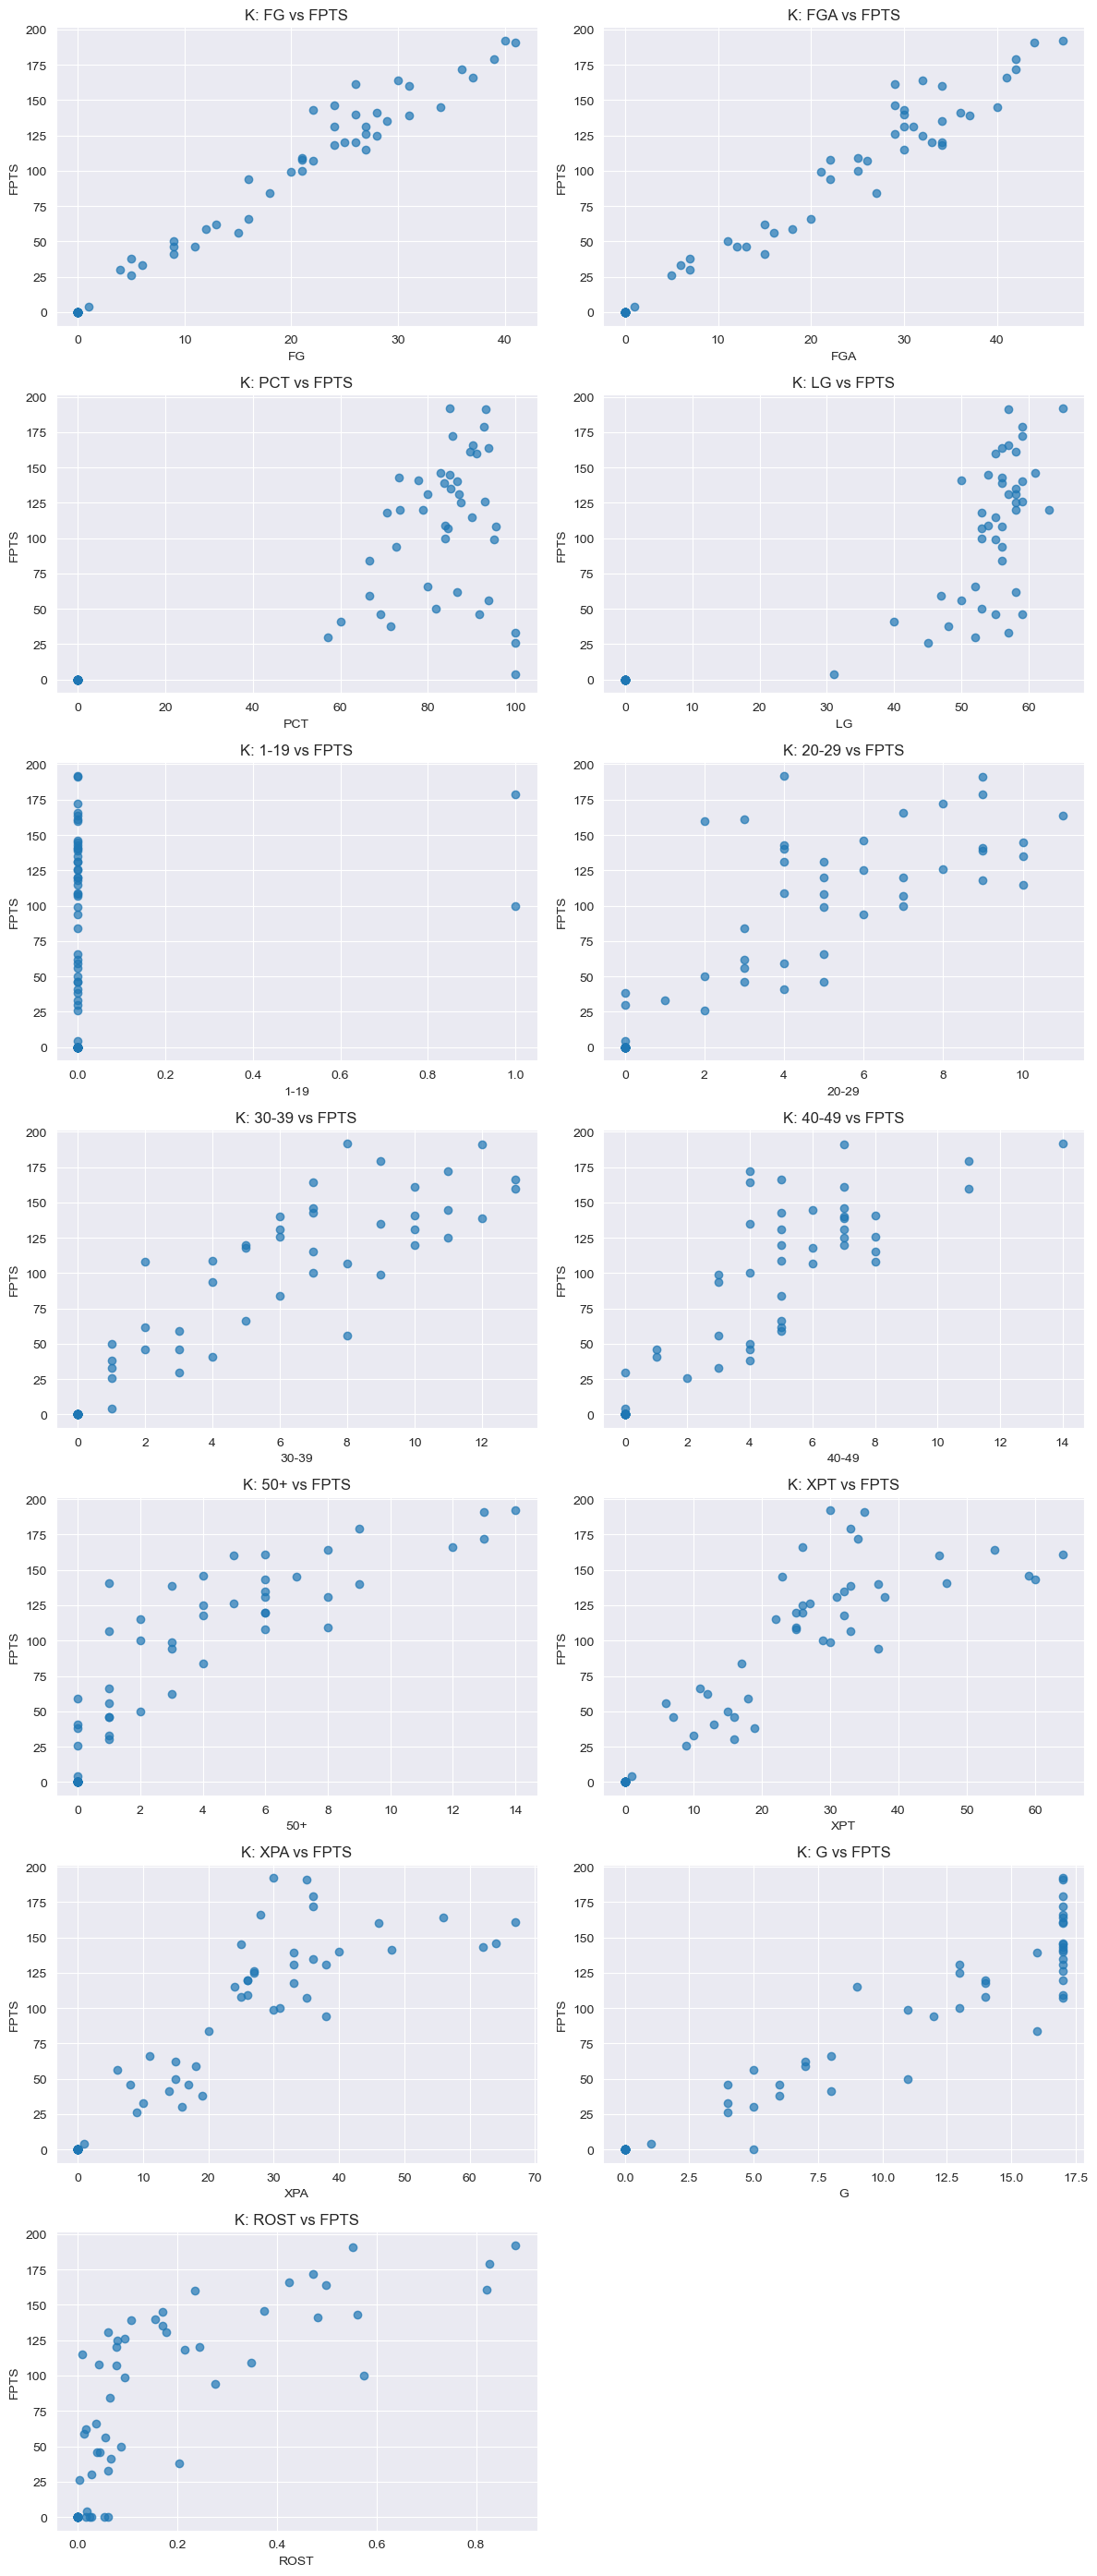

In [40]:
plot_k_graphs(k24)

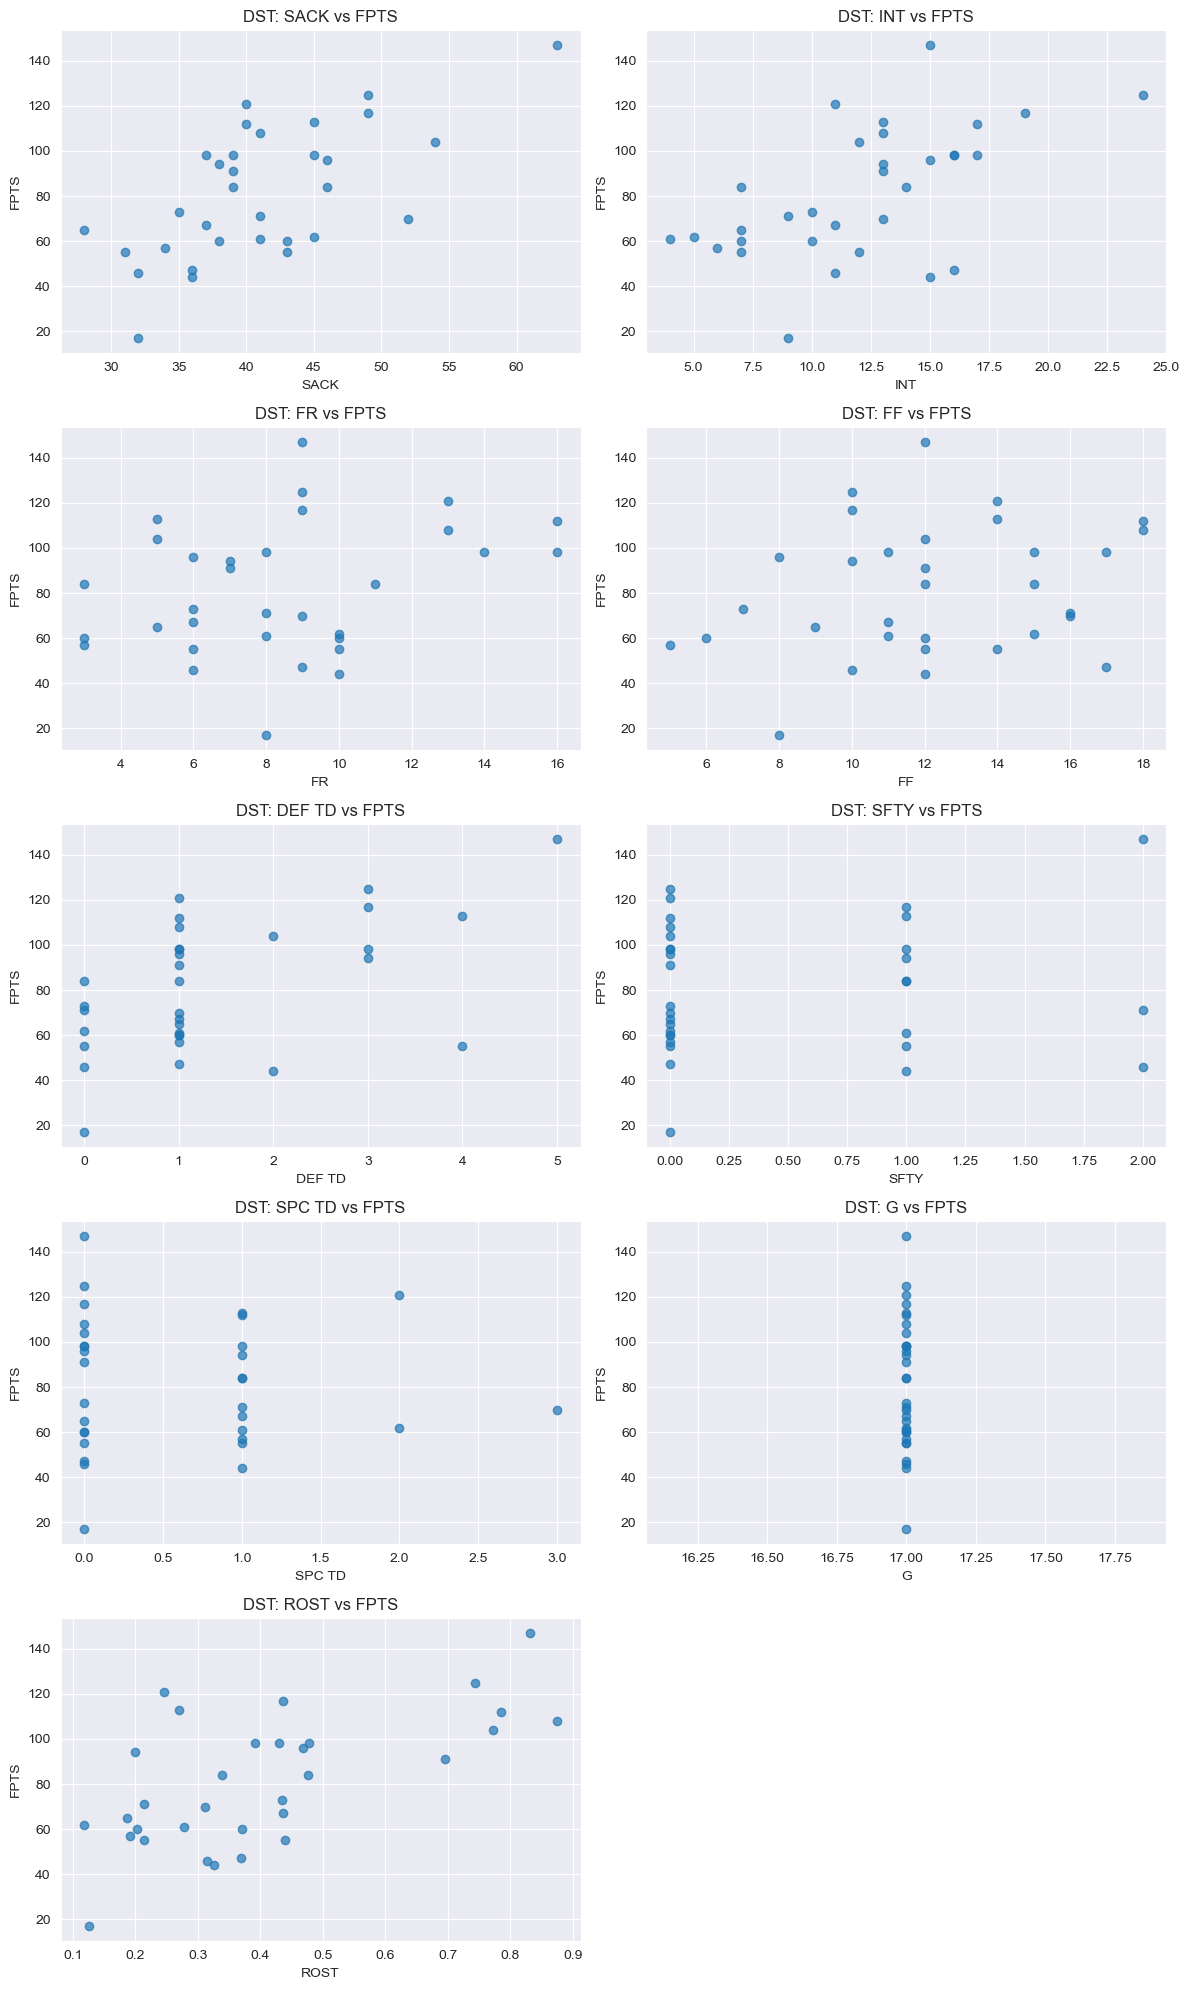

In [41]:
plot_dst_graphs(dst24)

Most Important Features By Position:
- QB: Pass Attempts, Pass Completions, Pass Yards, Pass TDs
- RB: Rushing Attempts, Rushing Yards, Rushing TDs, Receptions
- WR: Receptions, Receiving Yards, Receiving TDs, 20+ Yard Receptions
- TE: Receptions, Receiving Yards, Receiving TDs, 20+ Yard Receptions
- K: Field Goals Made, Extra Points Made, Field Goals Attempted, Extra Points Attempted
- DST: Sacks, Interceptions
